## Consigna: Leer los set de datos w_data.csv y p_data.csv, fusionarlos a partir de la variable que tengan en común (ID)y realizar las siguientes ejercicios:
Aspectos a incluir en el entregable:
El código debe estar hecho en un notebook y debe estar probado. Recordar que si bien, la actividad
se realiza grupalmente, las entregas son individuales.


In [1]:
import pandas as pd
import numpy as np

In [5]:
w_data=pd.read_csv("w_data.csv",sep=";")
w_data.head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


In [7]:
p_data=pd.read_csv("p_data.csv",sep=";")
p_data.head();

In [11]:
#merge https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
df_unido = pd.merge(w_data, p_data, on='ID', how='outer', indicator='union')
df_unido.head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both


### 1Cuantos ID tienen en común. Nombrar cuales no tienen en común

In [14]:
df_comun=df_unido[df_unido.union=='both']
df_comun

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,245211.0,0.0,0.0,40.0,597186815,<=50K.,33.0,Male,White,United-States,Bachelors,13.0,Never-married,Own-child,both
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.,39.0,Female,White,United-States,Bachelors,13.0,Divorced,Not-in-family,both
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.,64.0,Male,Black,United-States,HS-grad,9.0,Widowed,Other-relative,both
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.,38.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both


### 2Corregir los target a solo dos valores distintos ‘<=50k’ y ‘>50k’

In [15]:
df_unido.groupby(by=df_unido['Target']).count()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
Target,,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
<=50K.,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841
>50K.,3846,3846,3846,3846,3846,3846,3845,3845,3845,3845,3845,3845,3845,3845,3846


In [49]:
df_unido['Target'] = df_unido['Target'].str.replace('<=50K.', '<=50K')
df_unido['Target'] = df_unido['Target'].str.replace('>50K.','>50K')
df_unido.groupby(by=df_unido['Target']).count()

C:\Users\Perspektiva 360\AppData\Local\Temp\ipykernel_18068\166886575.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_unido['Target'] = df_unido['Target'].str.replace('<=50K.', '<=50K')
C:\Users\Perspektiva 360\AppData\Local\Temp\ipykernel_18068\166886575.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_unido['Target'] = df_unido['Target'].str.replace('>50K.','>50K')


,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
Target,,,,,,,,,,,,,,,
<=50K,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155
>50K,11687,11687,11687,11687,11687,11687,11686,11686,11686,11686,11686,11686,11686,11686,11687


### 3 Calcular la proporción que hay entre personas con salarios >50k respecto del total para Entre personas de distinto sexo, Raza y Educacion. Por ejemplo cuál es el porcentaje de mujeres con un salario mayor a 50K y compararlo con el de los hombres. Lo mismo para personas de distintas razas y Educación

In [50]:
df_unido[df_unido['Sex'] == ' Female'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both
5,Private,284582.0,0.0,0.0,40.0,231557,<=50K,37.0,Female,White,United-States,Masters,14.0,Married-civ-spouse,Wife,both
6,Private,160187.0,0.0,0.0,16.0,393526,<=50K,49.0,Female,Black,Jamaica,9th,5.0,Married-spouse-absent,Not-in-family,both
8,Private,45781.0,14084.0,0.0,50.0,7496,>50K,31.0,Female,White,United-States,Masters,14.0,Never-married,Not-in-family,both
12,Private,122272.0,0.0,0.0,30.0,672660,<=50K,23.0,Female,White,United-States,Bachelors,13.0,Never-married,Own-child,both


In [51]:
df_unido[df_unido['Sex'] == ' Male'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
7,Self-emp-not-inc,209642.0,0.0,0.0,45.0,488425,>50K,52.0,Male,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,both


In [52]:
df_unido[df_unido['Target'] == ' >50K'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
7,Self-emp-not-inc,209642.0,0.0,0.0,45.0,488425,>50K,52.0,Male,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,both
8,Private,45781.0,14084.0,0.0,50.0,7496,>50K,31.0,Female,White,United-States,Masters,14.0,Never-married,Not-in-family,both
9,Private,159449.0,5178.0,0.0,40.0,576313,>50K,42.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
10,Private,280464.0,0.0,0.0,80.0,293735,>50K,37.0,Male,Black,United-States,Some-college,10.0,Married-civ-spouse,Husband,both
11,State-gov,141297.0,0.0,0.0,40.0,109140,>50K,30.0,Male,Asian-Pac-Islander,India,Bachelors,13.0,Married-civ-spouse,Husband,both


In [53]:
df_unido[df_unido['Target'] == ' <=50K'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both


In [58]:
df_unido['Sex'] = df_unido['Sex'].str.strip()
df_unido['Target'] =df_unido['Target'].str.strip()
df_unido['Race'] = df_unido['Race'].str.strip()
df_unido['Education'] = df_unido['Education'].str.strip()

In [59]:
more_than_50K =df_unido[df_unido['Target'] == '>50K']
more_than_50K

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
7,Self-emp-not-inc,209642.0,0.0,0.0,45.0,488425,>50K,52.0,Male,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,both
8,Private,45781.0,14084.0,0.0,50.0,7496,>50K,31.0,Female,White,United-States,Masters,14.0,Never-married,Not-in-family,both
9,Private,159449.0,5178.0,0.0,40.0,576313,>50K,42.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
10,Private,280464.0,0.0,0.0,80.0,293735,>50K,37.0,Male,Black,United-States,Some-college,10.0,Married-civ-spouse,Husband,both
11,State-gov,141297.0,0.0,0.0,40.0,109140,>50K,30.0,Male,Asian-Pac-Islander,India,Bachelors,13.0,Married-civ-spouse,Husband,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48816,Private,149347.0,0.0,0.0,50.0,265987776,>50K,38.0,Male,White,United-States,Masters,14.0,Married-civ-spouse,Husband,both
48817,Local-gov,23157.0,0.0,1902.0,50.0,1401566855,>50K,43.0,Male,White,United-States,Masters,14.0,Married-civ-spouse,Husband,both
48823,Private,202168.0,15024.0,0.0,55.0,865804180,>50K,40.0,Male,White,United-States,Prof-school,15.0,Married-civ-spouse,Husband,both
48827,Local-gov,139347.0,0.0,0.0,40.0,1211420416,>50K,50.0,Female,White,?,Masters,14.0,Married-civ-spouse,Wife,both


In [60]:
more_than_50K.count()

Workclass         11687
fnlwgt            11687
Capital Gain      11687
Capital Loss      11687
Hours per week    11687
ID                11687
Target            11687
Age               11686
Sex               11686
Race              11686
Country           11686
Education         11686
Education-Num     11686
Marital Status    11686
Relationship      11686
union             11687
dtype: int64

In [61]:
cantidad_empleados = df_unido['Sex'].count()
print(f'La cantidad de empleados es: {cantidad_empleados} ')
cantidad_empleados


La cantidad de empleados es: 48841 


48841

In [65]:
cantidad_mujeres = df_unido[df_unido['Sex']=='Female']['Sex'].count()
cantidad_mujeres

16192

In [66]:
cantidad_hombres = df_unido[df_unido['Sex']=='Male']['Sex'].count()
cantidad_hombres

32649

C:\Users\Perspektiva 360\AppData\Local\Temp\ipykernel_18068\3838390455.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  sexDistribution.axes.grid(b=True, axis='y')


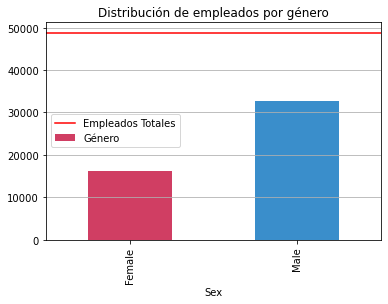

In [74]:
sexDistribution = df_unido.groupby('Sex').size().plot(kind='bar', label='Género', color=['#D03E63', '#3A8ECB'])
sexDistribution.set_title('Distribución de empleados por género')
sexDistribution.axes.grid(b=True, axis='y')
sexDistribution.axhline(totalEmpleados, color='red', label='Empleados Totales')
sexDistribution.legend()

In [77]:
more_than_50K_total = more_than_50K['Sex'].count()
more_than_50K_total

11686

In [78]:
more_than_50K_female = more_than_50K[more_than_50K['Sex']=='Female']['Sex'].count()
more_than_50K_female

1769

In [80]:
more_than_50K_male = more_than_50K[more_than_50K['Sex']=='Male']['Sex'].count()
more_than_50K_male

9917

In [81]:
round( ((more_than_50K['Sex'].value_counts() / len(more_than_50K))*100 ), ndigits=2)

Male      84.85
Female    15.14
Name: Sex, dtype: float64

In [82]:
round( ((more_than_50K['Sex'].value_counts() / len(df_unido[df_unido['Sex']=='Female']))*100 ), ndigits=2)

Male      61.25
Female    10.93
Name: Sex, dtype: float64

In [83]:
round( ((more_than_50K['Sex'].value_counts() / len(df_unido[df_unido['Sex']=='Male']))*100 ), ndigits=2)

Male      30.37
Female     5.42
Name: Sex, dtype: float64

In [84]:
#Raza

In [85]:
df_unido['Race'].value_counts()

White                 41761
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: Race, dtype: int64

In [86]:
more_than_50K['Race'].value_counts()

White                 10606
Black                   566
Asian-Pac-Islander      409
Amer-Indian-Eskimo       55
Other                    50
Name: Race, dtype: int64

In [87]:
round( ((more_than_50K['Race'].value_counts() / len(more_than_50K))*100 ), ndigits=2)

White                 90.75
Black                  4.84
Asian-Pac-Islander     3.50
Amer-Indian-Eskimo     0.47
Other                  0.43
Name: Race, dtype: float64

In [88]:
#Educación con sueldos mayores a 50K

In [89]:
df_unido['Education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8024
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: Education, dtype: int64

In [90]:
round( ((df_unido['Education'].value_counts() / len(df))*100 ), ndigits=2)

HS-grad         32.32
Some-college    22.27
Bachelors       16.43
Masters          5.44
Assoc-voc        4.22
11th             3.71
Assoc-acdm       3.28
10th             2.84
7th-8th          1.96
Prof-school      1.71
9th              1.55
12th             1.35
Doctorate        1.22
5th-6th          1.04
1st-4th          0.51
Preschool        0.17
Name: Education, dtype: float64

In [91]:
more_than_50K['Education'].value_counts()

Bachelors       3312
HS-grad         2503
Some-college    2063
Masters         1459
Prof-school      617
Assoc-voc        522
Doctorate        431
Assoc-acdm       413
11th              92
10th              87
7th-8th           62
12th              48
9th               41
5th-6th           27
1st-4th            8
Preschool          1
Name: Education, dtype: int64

In [92]:
round( ((more_than_50K['Education'].value_counts() / len(more_than_50K))*100 ), ndigits=2)

Bachelors       28.34
HS-grad         21.42
Some-college    17.65
Masters         12.48
Prof-school      5.28
Assoc-voc        4.47
Doctorate        3.69
Assoc-acdm       3.53
11th             0.79
10th             0.74
7th-8th          0.53
12th             0.41
9th              0.35
5th-6th          0.23
1st-4th          0.07
Preschool        0.01
Name: Education, dtype: float64